# Fitting COVID19 trends using Bayesian method

In this assignment, our goal is to fit the COVID 19 trends (confirmed cases of COVID 19 as a function of date) using the generalized growth model given by

\begin{align}
\frac{d C(t)}{dt} = r C(t)^p, \label{eq:ode} \tag{1}
\end{align}

where $t \in [0,T]$ is the time (in units of days), $r \geq 0$ is the growth rate, $p
\in [0,1]$ is the 'decceleration of growth' parameter, see **Viboud et al 2015**. Special cases: $p = 0$ gives linear growth model and $p=1$ gives exponential growth model. 

$C : [0,T] \to [0, \infty)$ is the total confirmed COVID 19 cases at time $t$. When $0 < p < 1$, Eq (1) can be solved to get 

\begin{align}
C(t) = \left( \frac{r}{m}t + (C_0)^{1/m} \right)^m, \label{eq:model} \tag{2}
\end{align}

where $m = 1/(1 - p)$ and $C_0 = C(0)$ is the initial condition. For special cases $p=0$ and $p=1$, $C$ can be found easily.

# Problem

We cosider COVID 19 data at discrete times $\bar{t} = (t_1=0, t_2=1, ..., t_N=83)$, where $N = 84$, and corresponding total confirmed cases $Y(\bar{t}) = (Y_1, Y_2, ..., Y_N)$.

Model prediction is $C(\bar{t}) = (C(t_1), C(t_2), ..., C(t_N))$ where $C(t_i)$ is given by Eq (2). The model parameters are $\theta = (r, p)$. Take uniform prior for $\theta$ and consider a Guassian noise with zero mean and standard deviation $\sigma$. Divide the data in calibration and validation by taking first $N_c = 50$ as the calibration data and rest $N_v = N - N_c$ as validation data. You can also try different priors for parameters and divide data differently in calibration and validation set.

Problem: Predict the total confirmed cases at $T = 100$ day for three countries US, Japan, and South Korea.

## Data
Data for current epidemic COVID 19 can be found in several places such as:

- [datasets/covid-19](https://github.com/datasets/covid-19)

- [CSSEGISandData/COVID-19](https://github.com/CSSEGISandData/COVID-19)

- [nytimes/covid-19-data](https://github.com/nytimes/covid-19-data)


In [StudyCovid19](https://github.com/prashjha/StudyCovid19) you will find python scripts to process data and this notebook in directory `process/bayesian`.


Below we plot the confirmed cases for various countries

Num days: 84


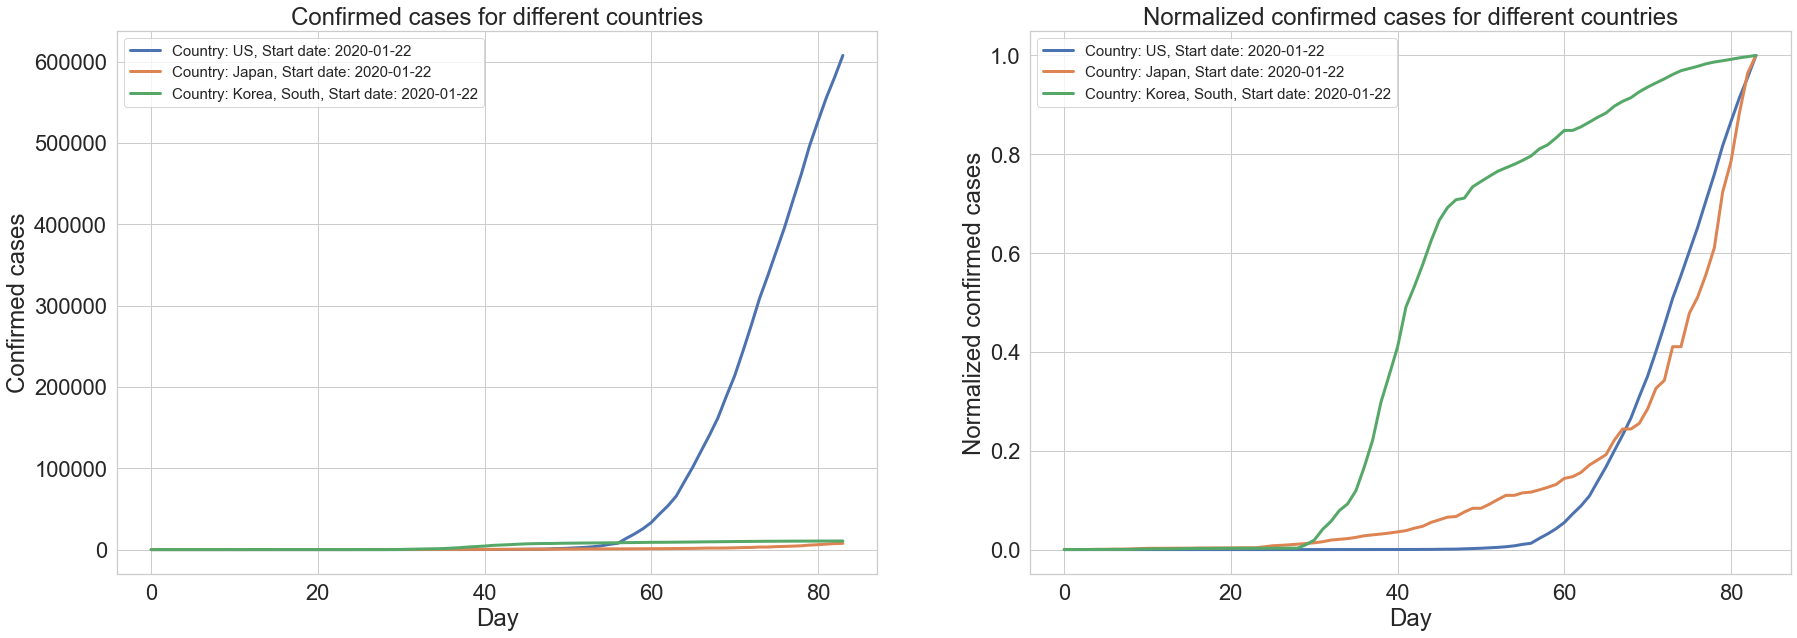

In [1]:
import pandas as pd
import numpy as np
import sys
sys.path.insert(0,'../')
from data import plot_countries_all_plus_normalize_1 as plot
from data import save_country_data_1 as save

import pymc3 as pm
from pymc3.ode import DifferentialEquation
import arviz as az
from sklearn.metrics import mean_squared_error, r2_score


# import models
from models import model1, model2, model3

df = pd.read_csv('../../data/datasets/time-series-19-covid-combined.csv')
# plot
plot(df, ['US', 'Japan', 'Korea, South'])
# save data
save(df, ['US', 'Japan', 'Korea, South'])

In [2]:
df_US = pd.read_csv('./US.csv', header=None)
df_Korea = pd.read_csv('./Korea, South.csv', header=None)
df_Japan = pd.read_csv('./Japan.csv', header=None)

In [3]:
calibration_US, validation_US = df_US.iloc[:51], df_US.iloc[51:]
calibration_Korea, validation_Korea = df_Korea.iloc[:51], df_Korea.iloc[51:]
calibration_Japan, validation_Japan = df_Japan.iloc[:51], df_Japan.iloc[51:]

calibration_times = calibration_US[0].to_numpy()
validation_times = validation_US[0].to_numpy()

## Model 1 US

In [13]:
calibration_cases = calibration_US[1].to_numpy()
std = calibration_cases.std()
yobs = np.random.normal(0, std)

In [36]:
with pm.Model() as model1_US:
    sigma = pm.Normal('sigma', std)
    r = pm.Uniform('r', 0.01, 100)
    p = pm.Uniform('p', 0.1, 0.99)
    solution = model1([r, p], 1, [1])
    print(solution)
    Y = pm.Normal('Y', mu=solution, sd=sigma, observed=yobs)

    prior = pm.sample_prior_predictive()
    trace = pm.sample()
    posterior_predictive = pm.sample_posterior_predictive(trace)
    data1_US = az.from_pymc3(trace=trace, prior=prior, posterior_predictive=posterior_predictive)

Auto-assigning NUTS sampler...
Initializing NUTS using jitter+adapt_diag...


Elemwise{pow,no_inplace}.0


Multiprocess sampling (2 chains in 2 jobs)
NUTS: [p, r, sigma]
Sampling 2 chains, 126 divergences: 100%|██████████| 2000/2000 [00:03<00:00, 588.62draws/s]
There were 65 divergences after tuning. Increase `target_accept` or reparameterize.
There were 60 divergences after tuning. Increase `target_accept` or reparameterize.
The estimated number of effective samples is smaller than 200 for some parameters.
100%|██████████| 1000/1000 [00:01<00:00, 656.53it/s]


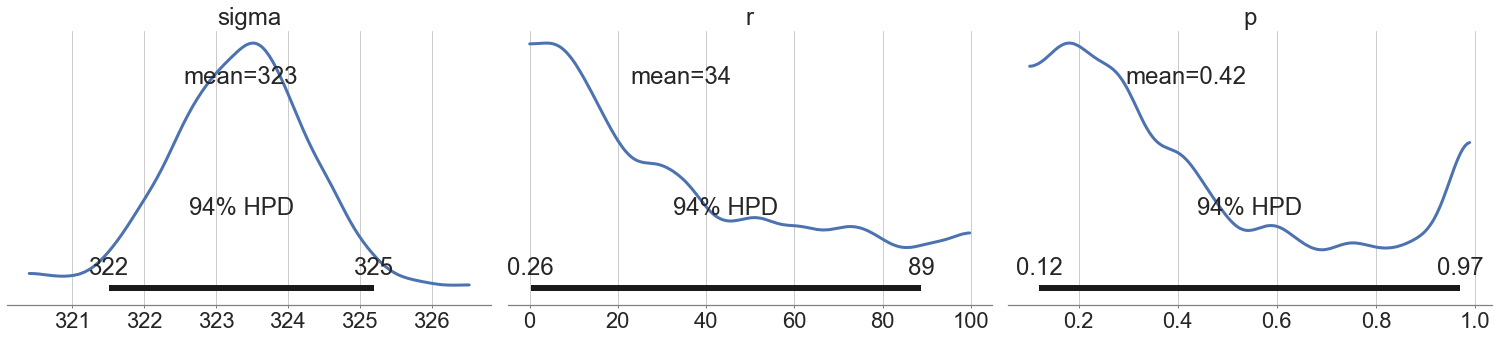

In [37]:
az.plot_posterior(data1_US);

In [38]:
C_model1_val = model1([34, 0.42], validation_times, [1])
r2_score(validation_US[1], C_model1_val)

0.45704258616260307

### Prediction for Day 100 US

In [39]:
model1([34, 0.42], 100, [1])

479837.4957840184

The predicted value for the number of cases in the US

## Model 1 Korea

In [16]:
calibration_cases = calibration_Korea[1].to_numpy()
std = calibration_cases.std()
yobs = np.random.normal(0, std)

In [17]:
with pm.Model() as model1_Korea:
    sigma = pm.Normal('sigma', std)
    r = pm.Uniform('r', 0.01, 100)
    p = pm.Uniform('p', 0.1, 0.99)
    solution = model1([r, p], 1, [1])
    Y = pm.Normal('Y', mu=solution, sd=sigma, observed=yobs)

    prior = pm.sample_prior_predictive()
    trace = pm.sample()
    posterior_predictive = pm.sample_posterior_predictive(trace)
    data1_Korea = az.from_pymc3(trace=trace, prior=prior, posterior_predictive=posterior_predictive)

Auto-assigning NUTS sampler...
Initializing NUTS using jitter+adapt_diag...
Multiprocess sampling (2 chains in 2 jobs)
NUTS: [p, r, sigma]
Sampling 2 chains, 156 divergences: 100%|██████████| 2000/2000 [00:03<00:00, 522.03draws/s]
There were 62 divergences after tuning. Increase `target_accept` or reparameterize.
There were 94 divergences after tuning. Increase `target_accept` or reparameterize.
The estimated number of effective samples is smaller than 200 for some parameters.
100%|██████████| 1000/1000 [00:01<00:00, 810.06it/s]


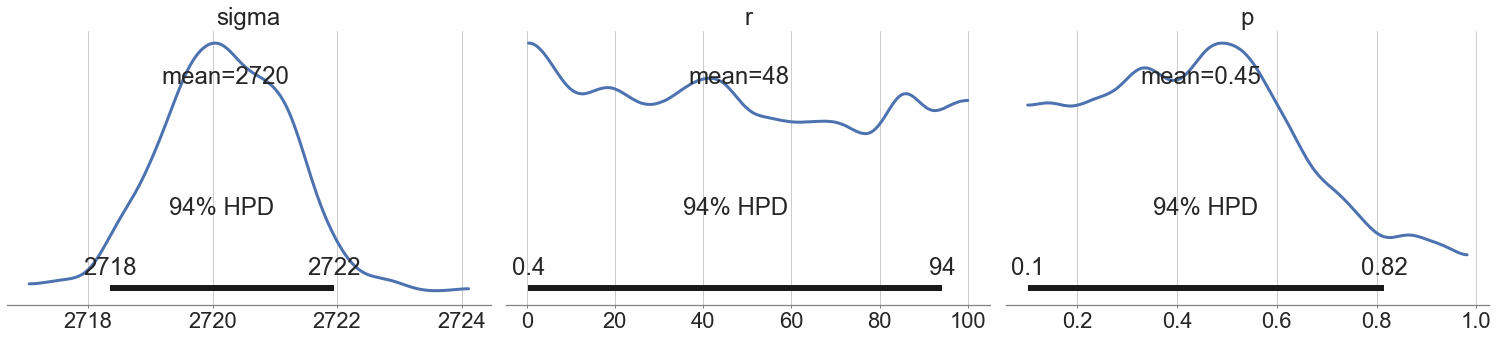

In [18]:
az.plot_posterior(data1_Korea);

In [ ]:
C_model1_val_Korea = model1([41, 0.45], validation_times, [1])
r2_score(validation_Korea[1], C_model1_val_Korea)

### Prediction for Day 100 Korea

In [ ]:
model1([41, 0.45], 100, [1])

## Model 1 Japan

In [7]:
calibration_cases = calibration_Japan[1].to_numpy()
std = calibration_cases.std()
yobs = np.random.normal(0, std)

In [65]:
with pm.Model() as model1_Japan:
    sigma = pm.Normal('sigma', std)
    r = pm.Uniform('r', 0.01, 10)
    p = pm.Uniform('p', 0.1, 0.99)
    solution = model1([r, p], 1, [2])
    Y = pm.Normal('Y', mu=solution, sd=sigma, observed=yobs)

    prior = pm.sample_prior_predictive()
    trace = pm.sample()
    posterior_predictive = pm.sample_posterior_predictive(trace)
    data1_Japan = az.from_pymc3(trace=trace, prior=prior, posterior_predictive=posterior_predictive)

Auto-assigning NUTS sampler...
Initializing NUTS using jitter+adapt_diag...
Multiprocess sampling (2 chains in 2 jobs)
NUTS: [p, r, sigma]
100%|██████████| 1000/1000 [00:01<00:00, 780.60it/s]


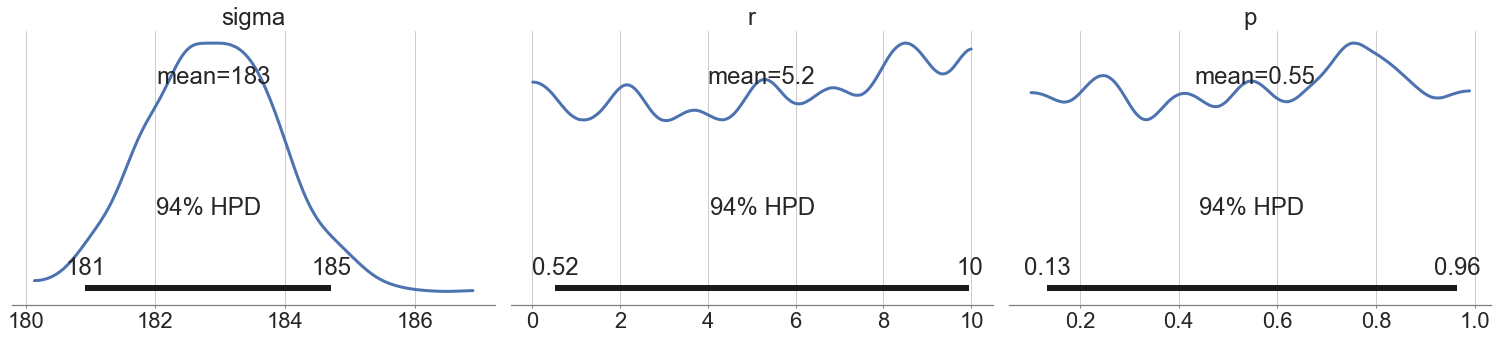

In [66]:
az.plot_posterior(data1_Japan);

In [67]:
C_model1_val_Japan = model1([5.2, 0.55], validation_times, [1])
r2_score(validation_Japan[1], C_model1_val_Japan)

-1498.177563899397

### Prediction for Day 100 Japan

In [68]:
model1([5.2, 0.55], 100, [1])

184832.48591083157

## Model 2 US

In [17]:
calibration_cases = calibration_US[1].to_numpy()
std = calibration_cases.std()
yobs = np.random.normal(0, std)

In [28]:
with pm.Model() as model2_US:
    sigma = pm.Normal('sigma', std)
    a = pm.Uniform('a', 1000, 1000000)
    b = pm.Uniform('b', 0.01, 0.1)
    solution = model2([a, b], calibration_times, [1])
    Y = pm.Normal('Y', mu=solution, sd=sigma, observed=yobs)

    prior = pm.sample_prior_predictive()
    trace = pm.sample()
    posterior_predictive = pm.sample_posterior_predictive(trace)
    data2_US = az.from_pymc3(trace=trace, prior=prior, posterior_predictive=posterior_predictive)

Auto-assigning NUTS sampler...
Initializing NUTS using jitter+adapt_diag...
Multiprocess sampling (2 chains in 2 jobs)
NUTS: [b, a, sigma]
Sampling 2 chains, 0 divergences: 100%|██████████| 2000/2000 [00:01<00:00, 1062.73draws/s]
The acceptance probability does not match the target. It is 0.9207586658891888, but should be close to 0.8. Try to increase the number of tuning steps.
The acceptance probability does not match the target. It is 0.9240084540604961, but should be close to 0.8. Try to increase the number of tuning steps.
100%|██████████| 1000/1000 [00:01<00:00, 761.62it/s]


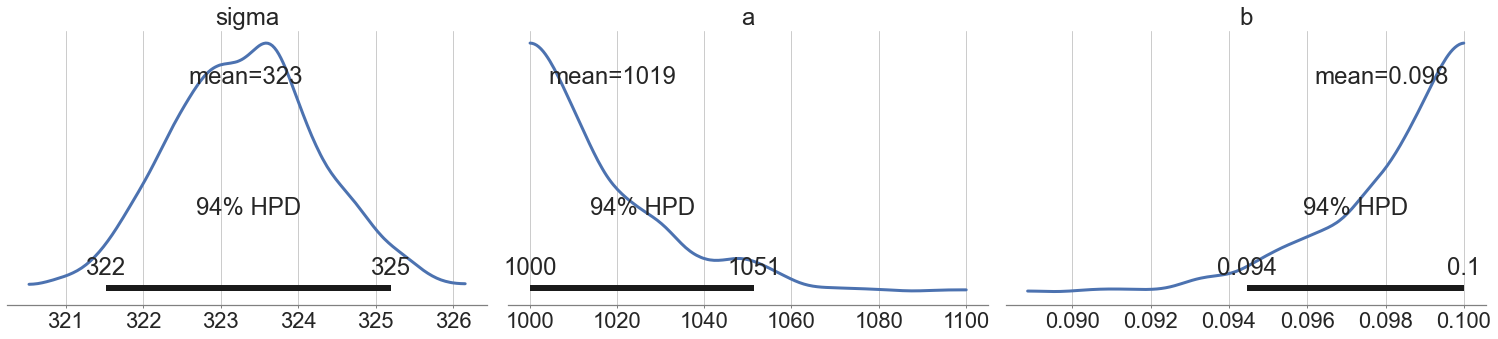

In [29]:
az.plot_posterior(data2_US);

In [30]:
C_model2_val = model2([1019, 0.092], validation_times, [1])
r2_score(validation_US[1], C_model2_val)

-1.096272331851217

### Prediction for Day 100 US

In [31]:
model2([1019, 0.092], 100, [1]) * 1e6

1000000.0

## Model 2 Korea

In [29]:
calibration_cases = calibration_Korea[1].to_numpy()
std = calibration_cases.std()
yobs = np.random.normal(0, std)

In [30]:
with pm.Model() as model2_Korea:
    sigma = pm.Normal('sigma', std)
    a = pm.Uniform('a', 1000, 1000000)
    b = pm.Uniform('b', 0, 1)
    solution = model2([a, b], calibration_times, [1])
    Y = pm.Normal('Y', mu=solution, sd=sigma, observed=yobs)

    prior = pm.sample_prior_predictive()
    trace = pm.sample()
    posterior_predictive = pm.sample_posterior_predictive(trace)
    data2_Korea = az.from_pymc3(trace=trace, prior=prior, posterior_predictive=posterior_predictive)

Auto-assigning NUTS sampler...
Initializing NUTS using jitter+adapt_diag...
Multiprocess sampling (2 chains in 2 jobs)
NUTS: [b, a, sigma]
100%|██████████| 1000/1000 [00:01<00:00, 674.25it/s]


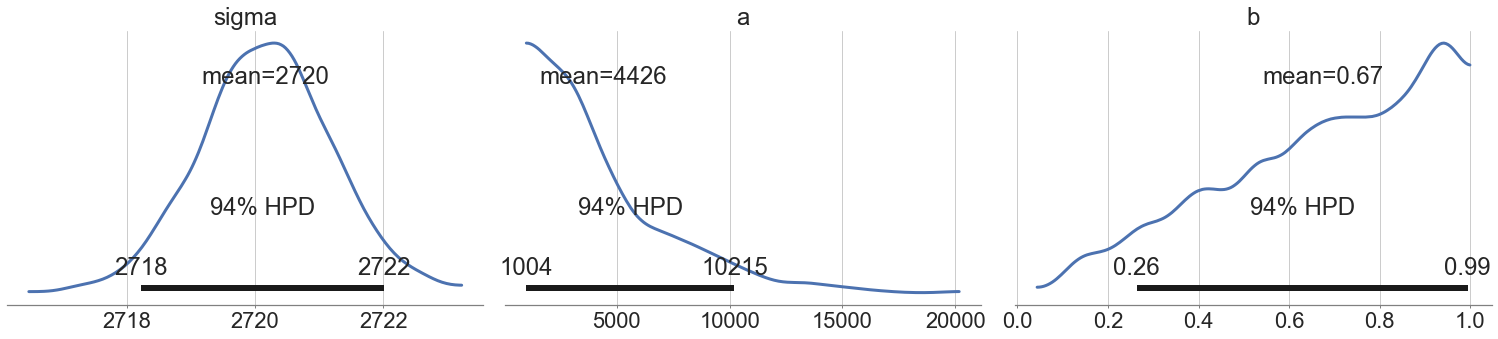

In [31]:
az.plot_posterior(data2_Korea);

In [32]:
C_model2_val = model2([4426, 0.67], validation_times, [1]) * 1e6
r2_score(validation_Korea[1], C_model2_val)

-1397087.626998981

### Prediction for Day 100 Korea

In [33]:
model2([4426, 0.67], 100, [1]) * 1e6

1000000.0

## Model 2 Japan

In [53]:
calibration_cases = calibration_Japan[1].to_numpy()
std = calibration_cases.std()
yobs = np.random.normal(0, std)

In [54]:
with pm.Model() as model2_Japan:
    sigma = pm.Normal('sigma', std)
    a = pm.Uniform('a', 1000, 1000000)
    b = pm.Uniform('b', 0, 1)
    solution = model2([a, b], calibration_times, [1])
    Y = pm.Normal('Y', mu=solution, sd=sigma, observed=yobs)

    prior = pm.sample_prior_predictive()
    trace = pm.sample()
    posterior_predictive = pm.sample_posterior_predictive(trace)
    data2_Japan = az.from_pymc3(trace=trace, prior=prior, posterior_predictive=posterior_predictive)

Auto-assigning NUTS sampler...
Initializing NUTS using jitter+adapt_diag...
Multiprocess sampling (2 chains in 2 jobs)
NUTS: [b, a, sigma]
100%|██████████| 1000/1000 [00:01<00:00, 683.20it/s]


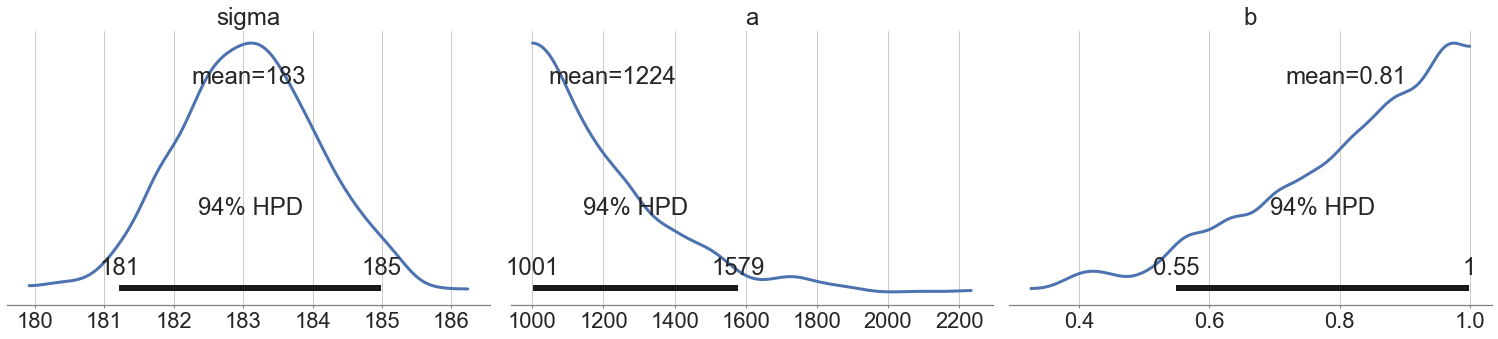

In [56]:
az.plot_posterior(data2_Japan);

In [57]:
C_model2_val = model2([1224, 0.81], validation_times, [1]) * 1e6
r2_score(validation_Japan[1], C_model2_val)

-240684.71227753215

### Prediction for Day 100 Japan

In [58]:
model2([1224, 0.81], 100, [1]) * 1e6

1000000.0

## Model 3 US

In [5]:
calibration_cases = calibration_US[1].to_numpy()
std = calibration_cases.std()
yobs = np.random.normal(0, std)

In [7]:
with pm.Model() as model3_US:
    sigma = pm.Normal('sigma', std)
    a = pm.Uniform('a', 10, 1000)
    b = pm.Uniform('b', 0.1, 1000)
    p = pm.Uniform('p', 0.2, 40)
    solution = model3([a, b, p], 1, [1, 110])
    Y = pm.Normal('Y', mu=solution, sd=sigma, observed=yobs)

    prior = pm.sample_prior_predictive()
    trace = pm.sample()
    posterior_predictive = pm.sample_posterior_predictive(trace)
    data3_US = az.from_pymc3(trace=trace, prior=prior, posterior_predictive=posterior_predictive)

Auto-assigning NUTS sampler...
Initializing NUTS using jitter+adapt_diag...
Multiprocess sampling (2 chains in 2 jobs)
NUTS: [p, b, a, sigma]
100%|██████████| 1000/1000 [00:02<00:00, 497.71it/s]


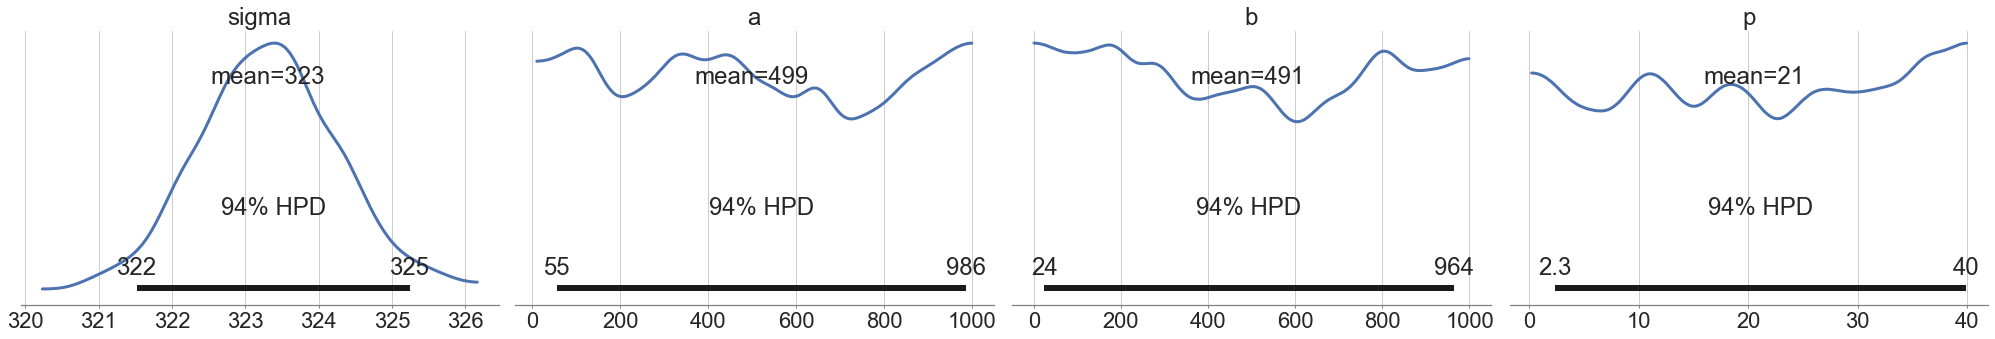

In [8]:
az.plot_posterior(data3_US);

In [17]:
C_model3_val = model3([499, 491, 21], validation_times, [1, 110])
r2_score(validation_US[1], C_model3_val)

-1.0910300188128073

### Prediction for Day 100 US

In [18]:
model3([499, 491, 21], 1, [1, 110]) * 1e6

1000000.0

## Model 3 Korea

In [14]:
calibration_cases = calibration_Korea[1].to_numpy()
std = calibration_cases.std()
yobs = np.random.normal(0, std)

In [15]:
with pm.Model() as model3_Korea:
    sigma = pm.Normal('sigma', std)
    a = pm.Uniform('a', 10, 1000)
    b = pm.Uniform('b', 0.1, 1000)
    p = pm.Uniform('p', 0.2, 40)
    solution = model3([a, b, p], 1, [1, 110])
    Y = pm.Normal('Y', mu=solution, sd=sigma, observed=yobs)

    prior = pm.sample_prior_predictive()
    trace = pm.sample()
    posterior_predictive = pm.sample_posterior_predictive(trace)
    data3_Korea = az.from_pymc3(trace=trace, prior=prior, posterior_predictive=posterior_predictive)

Auto-assigning NUTS sampler...
Initializing NUTS using jitter+adapt_diag...
Multiprocess sampling (2 chains in 2 jobs)
NUTS: [p, b, a, sigma]
100%|██████████| 1000/1000 [00:01<00:00, 603.34it/s]


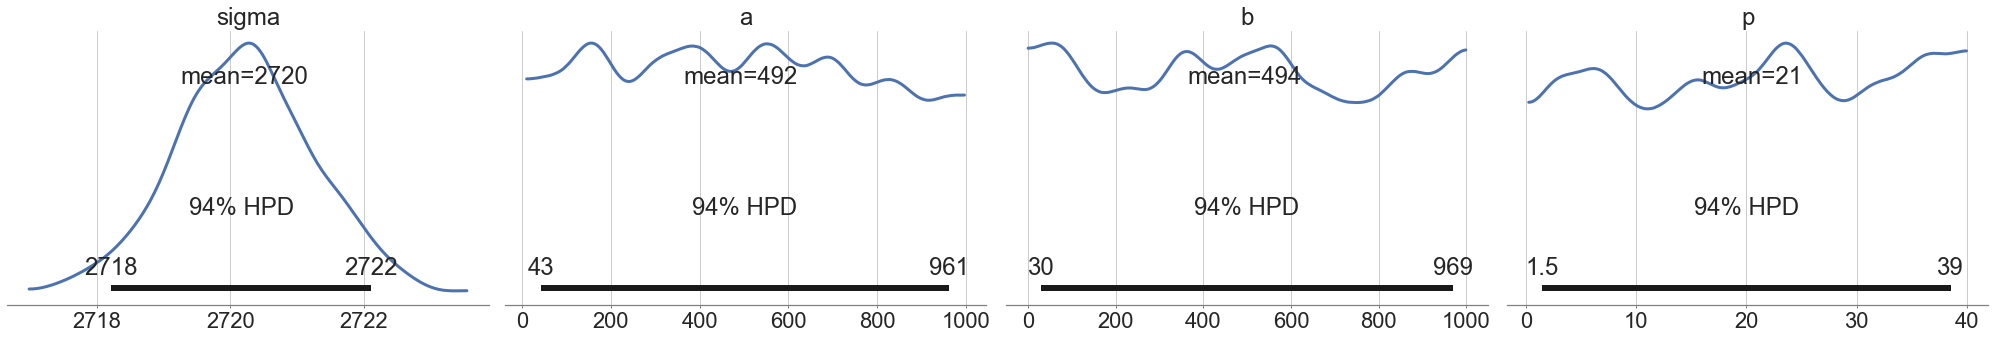

In [16]:
az.plot_posterior(data3_Korea);

In [20]:
C_model3_val = model3([492, 494, 21], validation_times, [1, 110]) * 1e6
r2_score(validation_Korea[1], C_model3_val)

-346005560648.6073

### Prediction for Day 100 Korea

In [21]:
model3([492, 494, 21], 100, [1, 110]) * 1e6

493000000.0

## Model 3 Japan

In [22]:
calibration_cases = calibration_Japan[1].to_numpy()
std = calibration_cases.std()
yobs = np.random.normal(0, std)

In [24]:
with pm.Model() as model3_Japan:
    sigma = pm.Normal('sigma', std)
    a = pm.Uniform('a', 10, 1000)
    b = pm.Uniform('b', 0.1, 1000)
    p = pm.Uniform('p', 0.2, 40)
    solution = model3([a, b, p], 1, [1, 110])
    Y = pm.Normal('Y', mu=solution, sd=sigma, observed=yobs)

    prior = pm.sample_prior_predictive()
    trace = pm.sample()
    posterior_predictive = pm.sample_posterior_predictive(trace)
    data3_Japan = az.from_pymc3(trace=trace, prior=prior, posterior_predictive=posterior_predictive)

Auto-assigning NUTS sampler...
Initializing NUTS using jitter+adapt_diag...
Multiprocess sampling (2 chains in 2 jobs)
NUTS: [p, b, a, sigma]
100%|██████████| 1000/1000 [00:01<00:00, 576.90it/s]


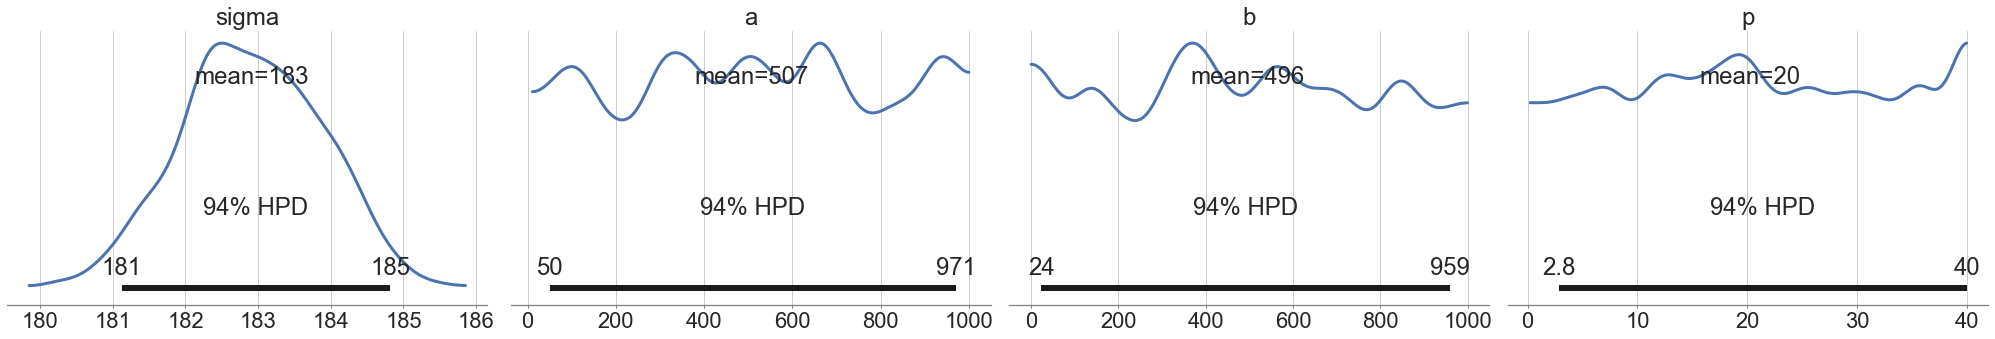

In [25]:
az.plot_posterior(data3_Japan);

In [26]:
C_model3_val = model3([507, 496, 20], validation_times, [1, 110]) * 1e6
r2_score(validation_Japan[1], C_model3_val)

-62412647003.15359

### Prediction for Day 100 Japan

In [27]:
model3([507, 496, 20], 100, [1, 110]) * 1e6

508000000.0

# References

- **Viboud et al 2015** Viboud, C., Simonsen, L. and Chowell, G., 2016. A generalized-growth model to characterize the early ascending phase of infectious disease outbreaks. Epidemics, 15, pp.27-37.